In [20]:
import gdown
import pandas as pd

# Define the URL of the CSV file
file_id = '1WClX4TtAVny-bz7AI1VNrqeGlnzyXiam'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file using gdown
output = 'sampled_data_full.csv'
gdown.download(url, output, quiet=False)

# Read the CSV file into a DataFrame
data = pd.read_csv(output)

# Filter the DataFrame to include only delayed flights
delayed_flights = data[data['DEP_DEL15'] == 1]
# Display the last few rows of the DataFrame

delayed_flights.tail()

Downloading...
From (original): https://drive.google.com/uc?id=1WClX4TtAVny-bz7AI1VNrqeGlnzyXiam
From (redirected): https://drive.google.com/uc?id=1WClX4TtAVny-bz7AI1VNrqeGlnzyXiam&confirm=t&uuid=9f82ea21-b0ef-4d7a-94f7-48d3659a543f
To: /Users/jinluwang/Downloads/Do work here/Challenges/Flight Delay/predictive_flight_delays_5/notebooks/sampled_data_full.csv
100%|████████████████████████████████████████████████| 268M/268M [00:12<00:00, 21.9MB/s]


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
1297788,2,4,1,1800-1859,4,3,76,150,American Airlines Inc.,20700,...,18,Dallas Fort Worth Regional,32.894,-97.030,Metropolitan Oakland International,0.00,0.0,0.0,39.0,10.29
1297796,2,6,1,1600-1659,2,3,21,143,Southwest Airlines Co.,10782,...,14,Detroit Metro Wayne County,42.217,-83.344,Stapleton International,0.00,0.0,3.9,40.0,10.51
1297800,4,5,1,2000-2059,3,4,2,128,Allegiant Air,1205,...,11,Greenville-Spartanburg,34.899,-82.214,Fort Lauderdale-Hollywood International,1.03,0.0,0.0,71.0,12.53
1297805,2,7,1,1600-1659,3,4,7,143,Southwest Airlines Co.,9017,...,14,Seattle International,47.447,-122.306,Phoenix Sky Harbor International,0.09,1.0,0.0,42.0,11.18
1297810,6,3,1,0700-0759,4,2,45,76,SkyWest Airlines Inc.,21878,...,4,Stapleton International,39.774,-104.880,Billings Logan International,0.00,0.0,0.0,83.0,7.83


### Carrier Performance based on Number of Delayed Flights

/var/folders/h6/rstm4b2j0g928d95j1p6tr400000gn/T/ipykernel_56456/2930255556.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Delays', y='Carrier', data=carrier_performance, palette='viridis')


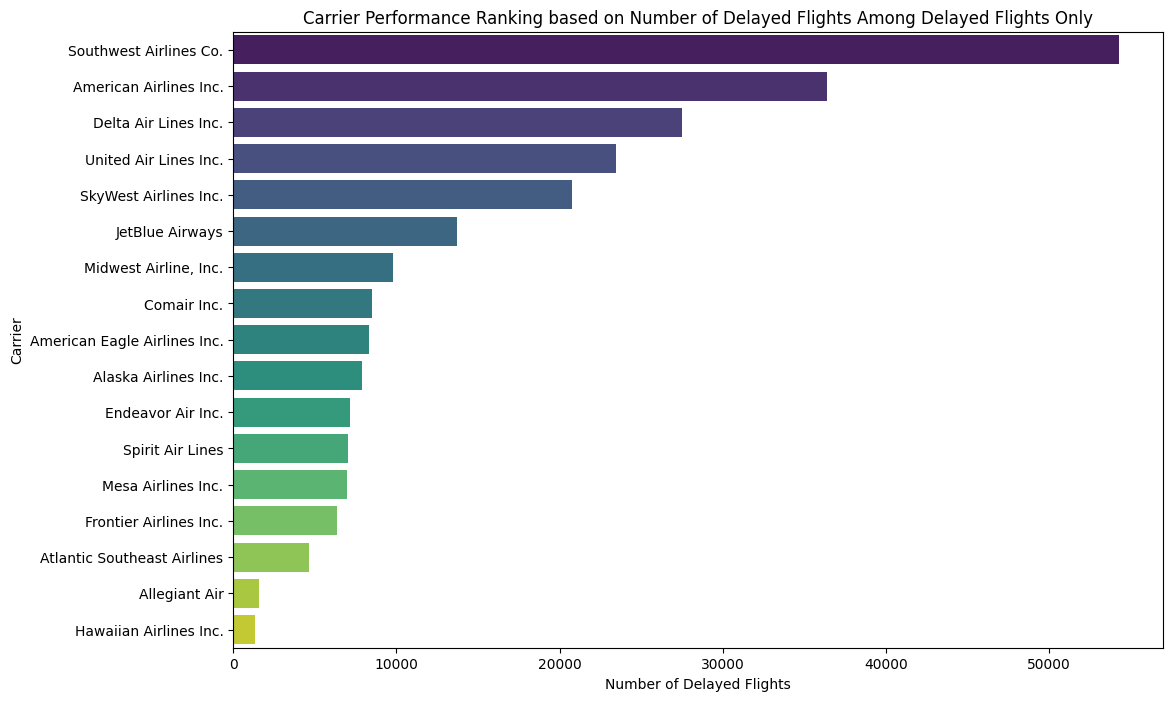

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by carrier and count the number of delayed flights
carrier_performance = delayed_flights['CARRIER_NAME'].value_counts().reset_index()
carrier_performance.columns = ['Carrier', 'Number of Delays']

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Delays', y='Carrier', data=carrier_performance, palette='viridis')
plt.title('Carrier Performance Ranking based on Number of Delayed Flights Among Delayed Flights Only')
plt.xlabel('Number of Delayed Flights')
plt.ylabel('Carrier')
plt.show()


### Carrier Performance based on Percentage of Delayed Flight against Total Flights per Carrier

/var/folders/h6/rstm4b2j0g928d95j1p6tr400000gn/T/ipykernel_56456/1114971857.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage Delayed', y='Carrier', data=carrier_performance, palette='Set2')


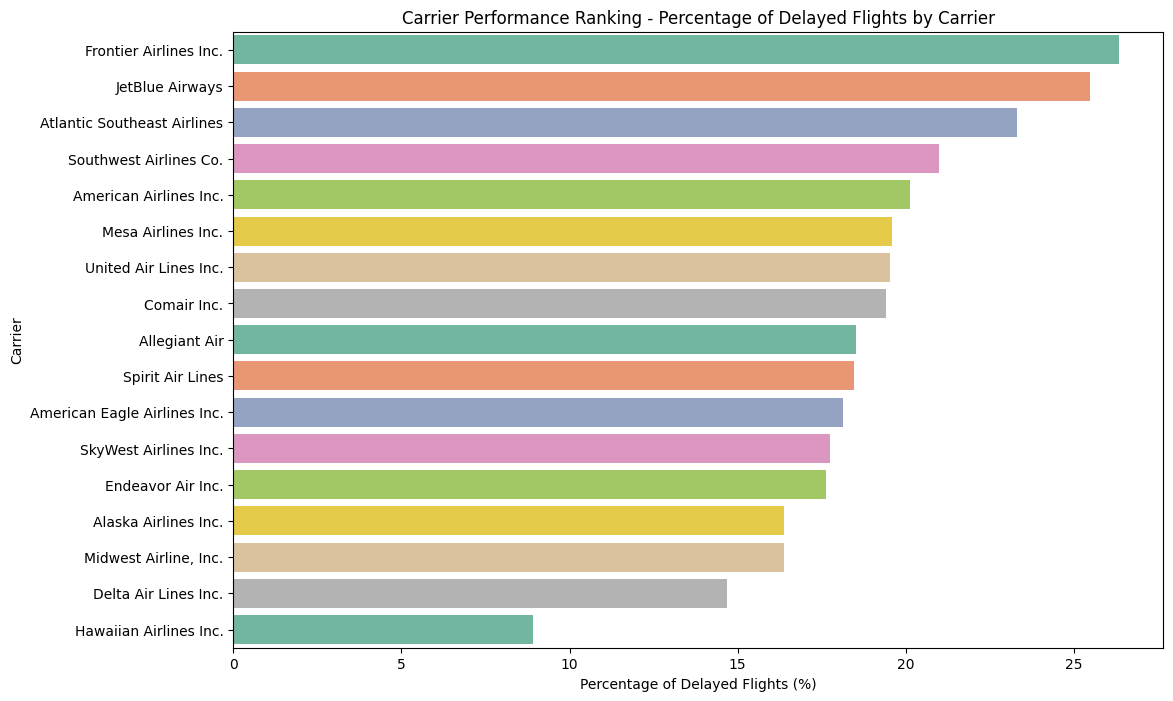

In [22]:
# Calculate the total number of flights for each carrier
total_flights = data['CARRIER_NAME'].value_counts().reset_index()
total_flights.columns = ['Carrier', 'Total Flights']

# Calculate the number of delayed flights for each carrier
delayed_flights = data[data['DEP_DEL15'] == 1]['CARRIER_NAME'].value_counts().reset_index()
delayed_flights.columns = ['Carrier', 'Delayed Flights']

# Merge the total flights and delayed flights DataFrames
carrier_performance = pd.merge(total_flights, delayed_flights, on='Carrier', how='left')

# Calculate the percentage of delayed flights
carrier_performance['Percentage Delayed'] = (carrier_performance['Delayed Flights'] / carrier_performance['Total Flights']) * 100

# Sort the DataFrame by percentage of delayed flights
carrier_performance = carrier_performance.sort_values(by='Percentage Delayed', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage Delayed', y='Carrier', data=carrier_performance, palette='Set2')
plt.title('Carrier Performance Ranking - Percentage of Delayed Flights by Carrier')
plt.xlabel('Percentage of Delayed Flights (%)')
plt.ylabel('Carrier')
plt.show()

### Carrier Performance based on Percentage of Delayed Flight against Total Delayed Flights of all Carriers

/var/folders/h6/rstm4b2j0g928d95j1p6tr400000gn/T/ipykernel_56456/3443394338.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage of Total Delayed Flights', y='Carrier', data=delayed_flights, palette='coolwarm')


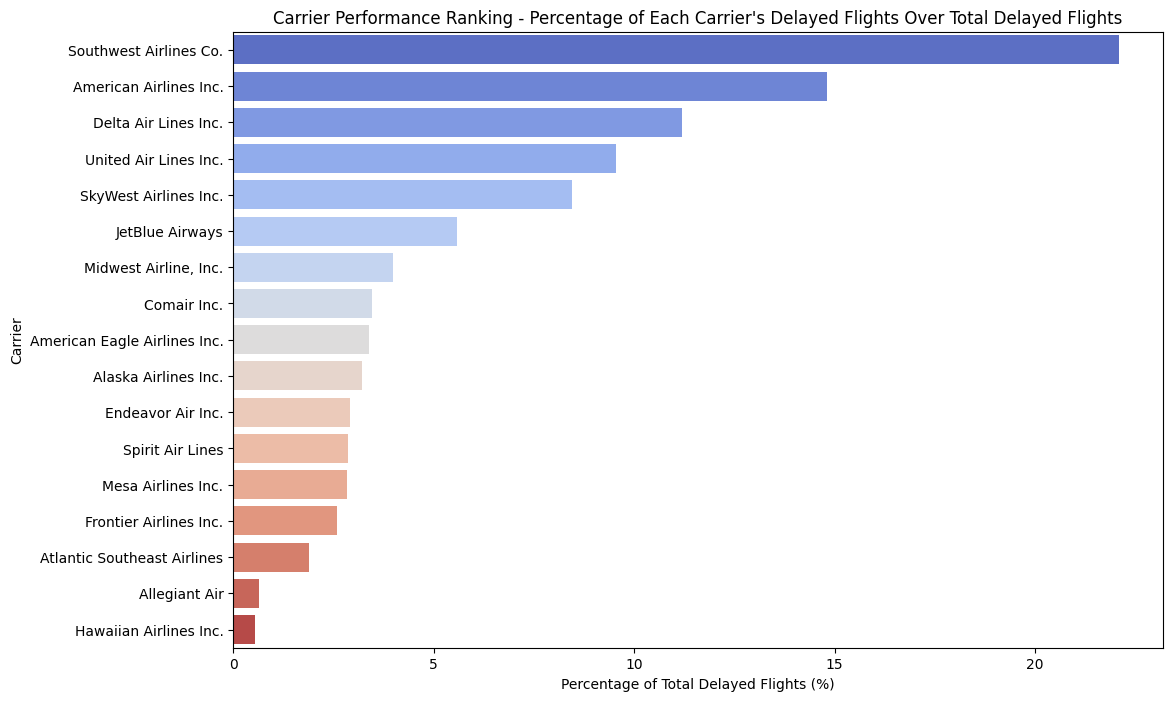

In [23]:
# Calculate the number of delayed flights for each carrier
# delayed_flights = delayed_flights['CARRIER_NAME'].value_counts().reset_index()
delayed_flights.columns = ['Carrier', 'Delayed Flights']

# Calculate the total number of delayed flights
total_delayed_flights = delayed_flights['Delayed Flights'].sum()

# Calculate the percentage of each carrier's delayed flights over the total delayed flights
delayed_flights['Percentage of Total Delayed Flights'] = (delayed_flights['Delayed Flights'] / total_delayed_flights) * 100

# Sort the DataFrame by percentage of total delayed flights
delayed_flights = delayed_flights.sort_values(by='Percentage of Total Delayed Flights', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage of Total Delayed Flights', y='Carrier', data=delayed_flights, palette='coolwarm')
plt.title('Carrier Performance Ranking - Percentage of Each Carrier\'s Delayed Flights Over Total Delayed Flights')
plt.xlabel('Percentage of Total Delayed Flights (%)')
plt.ylabel('Carrier')
plt.show()